# Caso grupal: Uso de filtros espaciales y morfológicos

|   |     |     |     |     |
|:------|:------|:------|:------|:------|
|   **Asignatura**  | Percepción Computacional|
|   **Grupo**   | 27    |         |   **Integrantes**      | Daniel Díaz Rodríguez  |
|   **Equipo**      | 2 |         |         | Sonia Ortega Martín |
|   **Fecha**       | 03-02-2021 |         |         |   |


Se plantea el problema de determinar el alcance espacial del cambio en la masa forestal producido por las talas y desmonetes. 

En argentina, sobre todo en la región del Chaco semiárido, el avance temprano de desmontes, prohibido por la Ley de Bosques desde 2008, concentra el mayor el porcentaje de la deforestación total del país.

La Corte Suprema Argentina instó a La Secretaría de Medio Ambiente y Desarrollo Sustentable de la Nación y a la provincia de Salta a realizar una Evaluación de Impacto Ambiental Acumulativo (EIAAc), la cual encargó un informe a un equipo de
investigadores, docentes y estudiantes de la FAUBA, el INTA y el CONICET. Este informe titulado "Elementos conceptuales y metodológicos para la Evaluación de Impactos Ambientales Acumulativos (EIAAc) en los bosques subtropicales" aporta los  elementos conceptuales y metodológicos necesarios para realizar la evaluación de EIAAc.

El objetivo es realizar un seguimiento y mapeo de los desmontes e incendios en conjunto con los pueblos originarios y criollos afectados, a través de tecnología y herramientas informáticas, a fin de alertar sobre el avance de la deforestación. Uno de los objetivos que se plantea es determinar el alcance espacial y la dinámica temporal de la afectación por talas y desmontes en el Este de la Provincia de Salta, utilizando imágenes satelitales.

Nosotros vamos a intentar resolver ese objetivo, utilizando filtros espaciales y morfológicos, identificando las zonas de bosque que han sido reemplazadas. Para llevarlo a cabo hemos utilizado las observaciones de los satélites *Landsat* tomadas sobre la Provincia de Salta, al norte de Argentina. Las imágenes las hemos obtenido de [ciencia.nasa.gov](https://ciencia.nasa.gov/deforestaci%C3%B3n-en-el-gran-chaco-de-argentina). Se parte de dos imágenes sobre la misma zona con una diferencia de dos décadas entre ellas, en las que se puede apreciar cómo parte del bosque es reemplazada por grandes campos.

Actualmente existen herramientas tecnológicas para la defensa de los bosques como el [Global Forest Watch (GFW)](https://www.globalforestwatch.org/), que utilizan datos de satélites, machine learning y conocimiento científico para luchar contra la deforestación.

In [1]:
# importamos las librería necesarias.
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

In [2]:
# definimos los métodos comunes que nos servirán para cargar y mostrar las imágenes.
def carga_imagen(ruta_imagen):
    #carga la imagen a partir de la ruta
    img = cv2.imread(ruta_imagen)
    return img
def muestra_imagen(img,titulo):
    # representar la imágen pasada por parámetro.
    plt.rcParams['figure.figsize'] = [7, 9] 
    plt.imshow(img, cmap='gray', interpolation = 'bicubic')
    plt.title(titulo),plt.xticks([]), plt.yticks([])  
    plt.show()
def muestra_imagenes_linea(img1, img2, titulo1, titulo2, tamaño):
    plt.figure(figsize=tamaño)    
    plt.subplot(221), plt.imshow(img1, 'gray')
    plt.title(titulo1), plt.xticks([]), plt.yticks([])
    plt.subplot(222), plt.imshow(img2, 'gray')
    plt.title(titulo2), plt.xticks([]), plt.yticks([])
    plt.show()

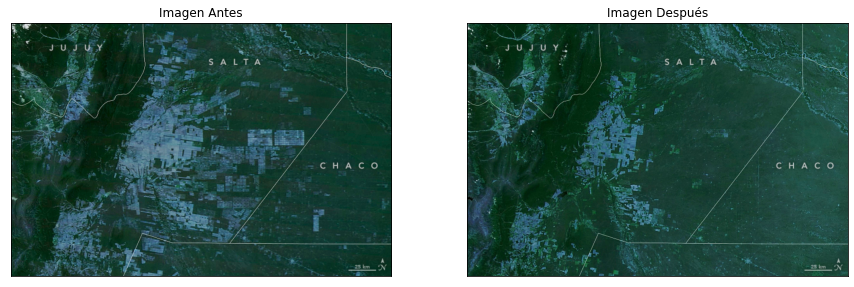

In [3]:
# cargamos la primera de las imágenes, la imagen más antigua que la consideraremos imagen Antes.
imagen_despues = carga_imagen('granchaco_2000.jpg')
# cargamos la segunda imagen, la más reciente. La consideraremos como imagen Después
imagen_antes = carga_imagen('granchaco_2019.jpg')
muestra_imagenes_linea(imagen_antes, imagen_despues,'Imagen Antes','Imagen Después',(15,12))

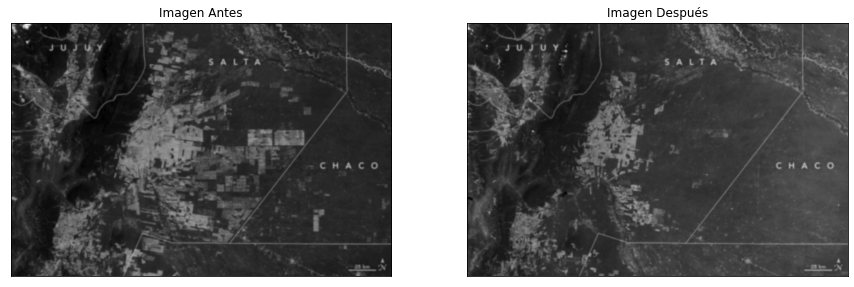

In [4]:
# Pasamos las imágenes a blanco y negro
# y aplicamos un filtro Gaussiano que nos servirá para suavizar las imágenes
# se utiliza un filtro de tamaño 51x51 
# el critero de tratamiento en los bordes se deja por defecto (interpolación BORDER_REFLECT_101)
image_blur = cv2.GaussianBlur(imagen_antes, (51,51), cv2.BORDER_DEFAULT)
image_bw = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY)
back_blur = cv2.GaussianBlur(imagen_despues, (51,51), cv2.BORDER_DEFAULT)
back_bw = cv2.cvtColor(back_blur, cv2.COLOR_BGR2GRAY)
muestra_imagenes_linea(image_bw, back_bw,'Imagen Antes','Imagen Después',(15,12))

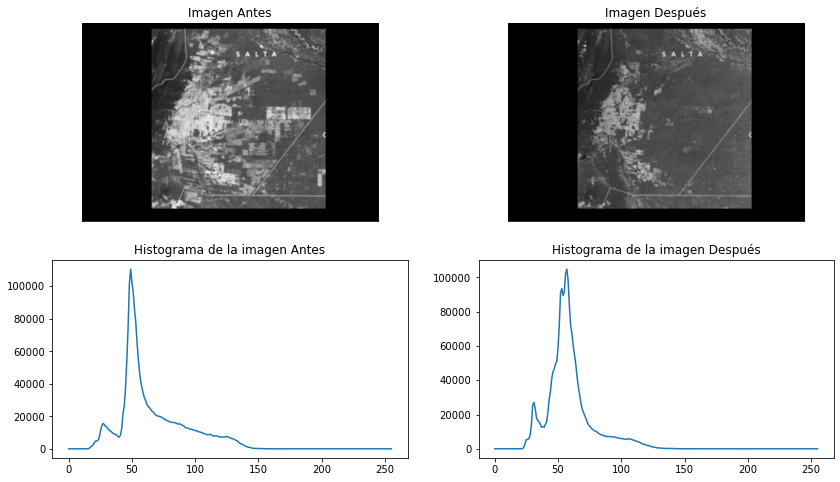

In [5]:
# La zona donde identificamos mayor cambio sería la parte cental.
# generamos una máscara que utilizaremos para centrarnos en esa parte de las fotografías
# calculamos el histograma de cada fotografía, centrándonos en la zona de la máscará.

# crear máscara
mask = np.zeros(image_bw.shape[:2], np.uint8)
mask[50:1600, 600:2100] = 255
masked_back = cv2.bitwise_and(back_bw,back_bw,mask = mask) # combinación entre la imagen de fondo y la máscara
masked = cv2.bitwise_and(image_bw,image_bw,mask = mask) # combinación entre la imagen principal y la máscara
# Calcular el histograma con máscara y sin máscara para la imagen de fondo
hist_full_back = cv2.calcHist([back_bw],[0],None,[256],[0,256])
hist_mask_back = cv2.calcHist([back_bw],[0],mask,[256],[0,256]) # El tercer argumento indica la máscara a utilizar  
# Calcular el histograma con máscara y sin máscara para la imagen de fondo
hist_full = cv2.calcHist([image_bw],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([image_bw],[0],mask,[256],[0,256]) # El tercer argumento indica la máscara a utilizar 
# Mostrar resultados     
plt.figure(figsize=(14,8))  
plt.subplot(221), plt.imshow(masked, 'gray')
plt.title('Imagen Antes'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(masked_back, 'gray')
plt.title('Imagen Después'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.plot(hist_mask)
plt.title('Histograma de la imagen Antes')
plt.subplot(224), plt.plot(hist_mask_back)
plt.title('Histograma de la imagen Después')
plt.show()

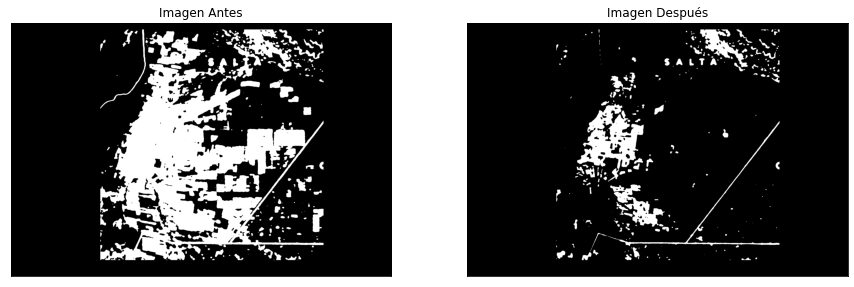

In [6]:
# De los histograma obtenemos los umbrales para cada imagen recortada, y lo aplicamos con threshold para binarizarlo
ret, mascara_back = cv2.threshold(masked_back, 80, 255, cv2.THRESH_BINARY)
ret, mascara_image = cv2.threshold(masked, 60, 255, cv2.THRESH_BINARY)
muestra_imagenes_linea(mascara_image, mascara_back,'Imagen Antes','Imagen Después',(15,12))

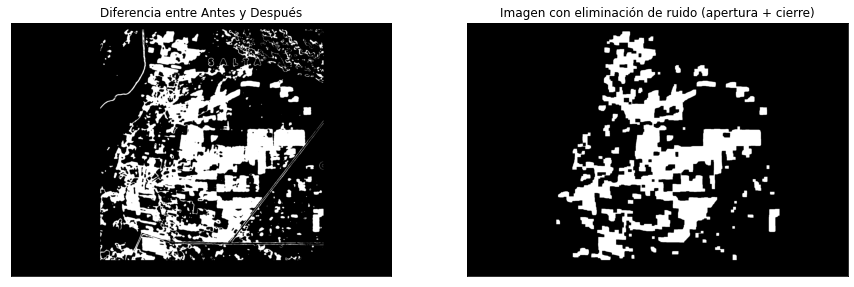

In [13]:
# Hacemos la diferencia entre las imágenes
diff = cv2.absdiff(mascara_image ,mascara_back )
# Utilizamos filtros morfológicos para eliminación de ruido.
# aplicamos apertura seguida de cierre
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 17)) # Kernel cuadrado de tamaño 17x17
opening = cv2.morphologyEx(diff, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
muestra_imagenes_linea(diff, closing,'Diferencia entre Antes y Después','Imagen con eliminación de ruido (apertura + cierre)',(15,12))

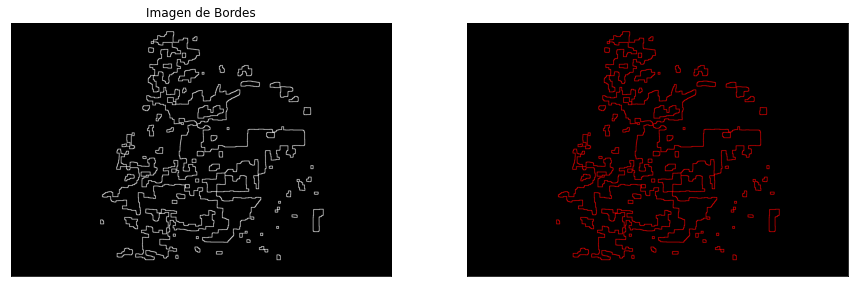

In [9]:
# calculamos bordes
# Utilizamos filtros morfológicos restando a la imagen de partida la imagen a la que se le ha aplicado erosion
kernel_2 = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9)) # Kernel cuadrado de tamaño 9x9
erosion = cv2.erode( closing, kernel_2, iterations = 1)
borde = closing - erosion
# Una vez tenemos el borde, obtenemos una imagen en color rojo.
red_image = np.zeros(imagen_antes.shape, np.uint8)
red_image[:, :, 0] = borde
muestra_imagenes_linea(borde, red_image,'Imagen de Bordes','',(15,12))

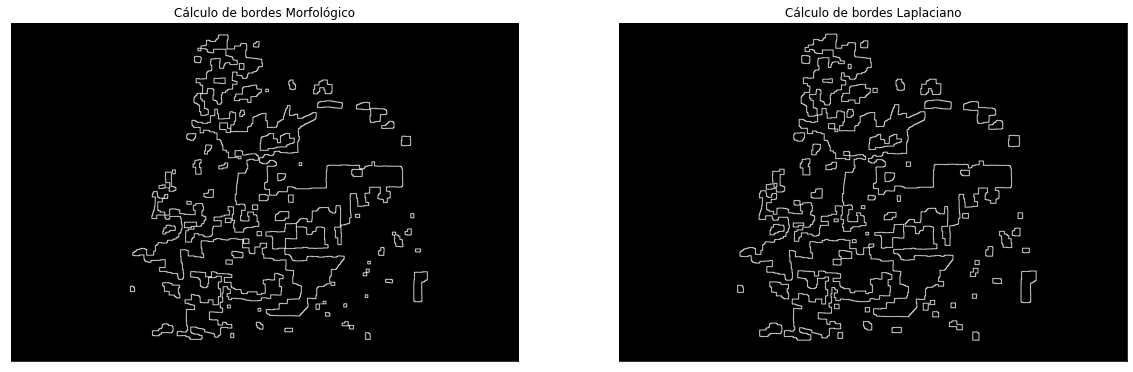

In [10]:
# otra forma para calcular los bordes sería aplicando filtros espaciales, filtro Laplaciano
laplacian =cv2.Laplacian(closing,cv2.CV_8U, ksize=9) # Kernel de tamaño 9x9
# comparamos ambos bordes
muestra_imagenes_linea(borde, laplacian,'Cálculo de bordes Morfológico','Cálculo de bordes Laplaciano',(20,15))

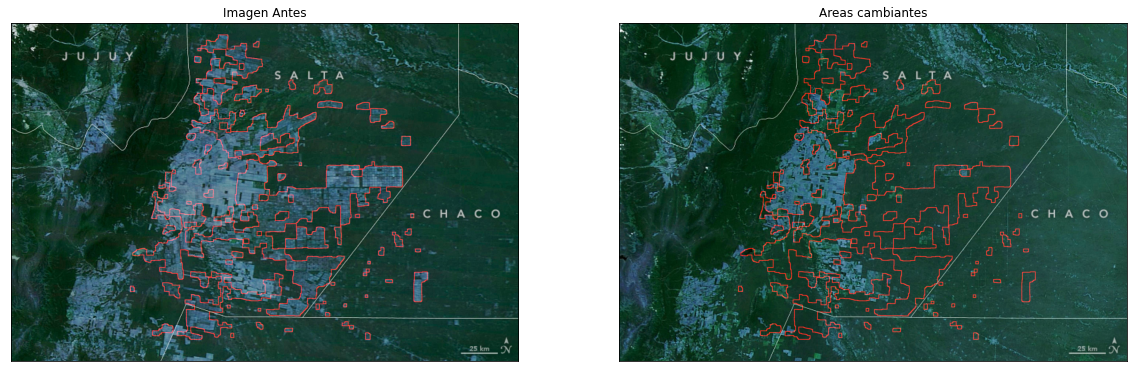

In [11]:
# Se resta el borde a ambas imágenes para poder determinar las áreas cambiantes
imagen_resaltada= cv2.bitwise_or(imagen_antes,red_image,mask = None)
imagen_resaltada2= cv2.bitwise_or(imagen_despues,red_image,mask = None)
muestra_imagenes_linea(imagen_resaltada, imagen_resaltada2,'Imagen Antes','Areas cambiantes',(20,15))

Como se puede apreciar se han identificado aquellas zonas donde se ha producido una deforestación a lo largo de las dos décadas.
Las zonas delimitadadas por los bordes servirían para medir y determinar la tasa de deforestación.
Tras realizar el análisis se aprecia que una de los mayores inconvenientes para realizar esta técnica es que las imágenes tomadas deben ser muy precisas respecto a la zona a estudiar para que la comparativa sea efectiva.

## Información asociada a la actividad conjunta


|   |   Daniel Díaz Rodríguez  |   Sonia Ortega Martín  |
|:------|:------|:------|
|   **Ha participado activamente en el grupo**  | Sí | Sí |
|   **Ha asistido y participado en las reuniones**      | Sí | Sí |
|   **Ha participado en la elaboración de la actividad**       | Sí | Sí |
|   **Ha realizado las tareas asignadas por el equipo**       | Sí | Sí |


Del grupo inicial, nos comunicaron que los dos miembros: Oscar Iglesias Bou y Joseba Barrera Mayo no cursarían esta asignatura este año, por lo que finalmente el grupo lo componemos dos personas:  Daniel Díaz Rodríguez y Sonia Ortega Martín. Ambos hemos participado conjuntamente en la realización de la actividad.



https://blog.orange.es/innovacion/tecnologia-para-reforestar/#

https://www.globalforestwatch.org/map/country/ARG/17/?mainMap=eyJzaG93UmVjZW50SW1hZ2VyeSI6dHJ1ZSwic2hvd0FuYWx5c2lzIjp0cnVlfQ%3D%3D&map=eyJjZW50ZXIiOnsibGF0IjotMjQuODA3NTQzNTk3NDMwNzEyLCJsbmciOi02NC4wNTgxODY0ODk2NjQyfSwiem9vbSI6Ny45MDM4ODIxNjYxNjYwOTUsImNhbkJvdW5kIjpmYWxzZSwiZGF0YXNldHMiOlt7ImRhdGFzZXQiOiJyYWRkLWRlZm9yZXN0YXRpb24tYWxlcnRzIiwib3BhY2l0eSI6MSwidmlzaWJpbGl0eSI6dHJ1ZSwibGF5ZXJzIjpbImRlZm9yZXN0YXRpb24tYWxlcnRzLXJhZGQiXX0seyJkYXRhc2V0IjoiZ2xhZC1kZWZvcmVzdGF0aW9uLWFsZXJ0cyIsIm9wYWNpdHkiOjEsInZpc2liaWxpdHkiOnRydWUsImxheWVycyI6WyJkZWZvcmVzdGF0aW9uLWFsZXJ0cy1nbGFkIl19LHsiZGF0YXNldCI6InBvbGl0aWNhbC1ib3VuZGFyaWVzIiwibGF5ZXJzIjpbImRpc3B1dGVkLXBvbGl0aWNhbC1ib3VuZGFyaWVzIiwicG9saXRpY2FsLWJvdW5kYXJpZXMiXSwib3BhY2l0eSI6MSwidmlzaWJpbGl0eSI6dHJ1ZX0seyJkYXRhc2V0IjoidHJlZS1jb3Zlci1nYWluIiwibGF5ZXJzIjpbInRyZWUtY292ZXItZ2Fpbi0yMDAxLTIwMTIiXSwib3BhY2l0eSI6MSwidmlzaWJpbGl0eSI6dHJ1ZX0seyJkYXRhc2V0IjoidHJlZS1jb3Zlci1sb3NzIiwibGF5ZXJzIjpbInRyZWUtY292ZXItbG9zcyJdLCJvcGFjaXR5IjoxLCJ2aXNpYmlsaXR5Ijp0cnVlfSx7ImRhdGFzZXQiOiJ0cmVlLWNvdmVyIiwibGF5ZXJzIjpbInRyZWUtY292ZXItMjAxMCJdLCJvcGFjaXR5IjoxLCJ2aXNpYmlsaXR5Ijp0cnVlfSx7ImRhdGFzZXQiOiJyZWNlbnQtc2F0ZWxsaXRlLWltYWdlcnkiLCJsYXllcnMiOlsicmVjZW50LXNhdGVsbGl0ZS1pbWFnZXJ5Il0sInZpc2liaWxpdHkiOnRydWUsIm9wYWNpdHkiOjEsImlzUmVjZW50SW1hZ2VyeSI6dHJ1ZSwicGFyYW1zIjp7InVybCI6Imh0dHBzOi8vZWFydGhlbmdpbmUuZ29vZ2xlYXBpcy5jb20vdjFhbHBoYS9wcm9qZWN0cy9lYXJ0aGVuZ2luZS1sZWdhY3kvbWFwcy9mYzBkZjViZGE0NDQyOGNmYjQ3NWRkMDhjNzZhNDk5My1iOTI0MWZkNGEyYWE0OWIxZmJlOTFjNzI4ZjU5OGM1Mi90aWxlcy97en0ve3h9L3t5fSJ9fV19&mapMenu=eyJkYXRhc2V0Q2F0ZWdvcnkiOiJmb3Jlc3RDaGFuZ2UifQ%3D%3D&menu=eyJkYXRhc2V0Q2F0ZWdvcnkiOiJmb3Jlc3RDaGFuZ2UiLCJtZW51U2VjdGlvbiI6ImRhdGFzZXRzIn0%3D

https://www.agro.uba.ar/noticias/interes-general-news/la-fauba-analiza-el-desmonte-en-salta

https://www.agro.uba.ar/noticias/jornadas-y-congresos-news/la-fauba-capacita-wichis-en-tecnologia-satelital-para-controlar-desmontes

https://inta.gob.ar/sites/default/files/script-tmp-inta-_salta_fauba.pdf

http://monitoreodesmonte.com.ar/

http://redaf.org.ar/wp-content/uploads/2008/05/deforestacion-en-salta-informe-asociana.pdf

bibliografia:

 Leake, Andrés; de Ecónomo, María (2008). La deforestación de Salta. 2004-2007. Salta: Fundación ASOCIANA. ISBN 978-987-24283-0-3.
 Leake, Andrés; López, Omar Enrique; Leake, María Cecilia (2016). La deforestación del Chaco Salteño 2004-2015. SMA Ediciones. ISBN 978-987-45348-4-2.
 
 Agronomía Informa: “La FAUBA analiza el desmonte en Salta”, por exposición del informe “Evaluación de Impactos Ambientales Acumulativos en el este de Salta”. 24 de septiembre de 2009"
